Team name - SparkPlugs

Team Members - 

Shikhar Dhoke


Gaurang Sonkavde


Nishigandha Zanje


College - SIT

Import Necessary Libraries

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
warnings.filterwarnings('ignore')

from keras.preprocessing.sequence import pad_sequences
import time

from plotly import graph_objs as go

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading All data and Cleaning

In [41]:
Tornado = pd.read_csv('/content/2011Tornado_Summary.csv')
Tornado

,num,text,timestamp,label
0,0,RT @uberdogfound: Please RT - Food needed for ...,40657.975000,1
1,1,Please RT - Food needed for shelter in NC in a...,40657.975000,1
2,3,‚ô°its raining and tornado warnings....about t...,40657.897917,1
3,9,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.766667,1
4,10,Saved by the tornado warning....I'm just ready...,40657.756250,0
...,...,...,...,...
3567,39,Thanks to @BarackObama and @SethMeyers21 for m...,40664.134028,0
3568,0,Stamford-based AmeriCares is preparing to send...,40663.670139,0
3569,2,Semi-trailer parked at People's Church Spring ...,40662.943750,0
3570,3,RT @TopNoTcH_B1tch: My mom is goin out of town...,40662.732639,0


In [42]:
Sandy = pd.read_csv('/content/2012Sandy_Summary.csv')
Floods = pd.read_csv('/content/2013Floods_Summary.csv')
Blizard = pd.read_csv('/content/2016Blizzard_Summary.csv')

In [43]:
Matthew = pd.read_csv('/content/2016Matthew_Summary.csv')


In [44]:
np.sum(Matthew.isnull().any(axis=1))

0

In [45]:
Matthew.duplicated().sum()

685

In [46]:
Matthew = Matthew.drop_duplicates(subset= ["text","timestamp",'label'])

In [47]:
Matthew.duplicated().sum()

0

In [48]:
Matthew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3823 entries, 0 to 5192
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   num        3823 non-null   float64
 1   text       3823 non-null   object 
 2   timestamp  3823 non-null   float64
 3   label      3823 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 149.3+ KB


In [50]:
Hurricane = pd.read_csv('/content/2017Hurricane_Summary.csv')
Hurricane

,num,text,timestamp,label
0,2,Your hurricane emergency kit should include at...,42964.60069,1
1,3,"Eclipse: overrated, over-hyped, schools are be...",42964.58264,1
2,9,Your hurricane emergency kit should include at...,42964.60069,1
3,10,"Eclipse: overrated, over-hyped, schools are be...",42964.58264,1
4,14,I wanna go back to New Orleans so bad I wanna...,42961.76319,1
...,...,...,...,...
7818,106,In the event that local pharmacies are closed ...,42983.86428,0
7819,109,Keep donations coming for Hurricane Harvey. S...,42983.61420,1
7820,110,.@Humana reminds Floridians to be sure to have...,42983.57384,0
7821,111,"With Hurricane Irma looming in the Caribbean, ...",42983.52024,0


In [52]:
Michael = pd.read_csv('/content/2018Michael_Summary.csv')

In [53]:
Michael = Michael.rename(columns ={"Unnamed: 0":"num", "sentiment":"label"})
print("before drop",Michael.count())
Michael= Michael.drop_duplicates(subset= ["text","timestamp",'label'])
print("before drop",Michael.count())

before drop num          4227
text         4227
timestamp    4227
label        4227
dtype: int64
before drop num          3581
text         3581
timestamp    3581
label        3581
dtype: int64


In [54]:
np.sum(Michael.isnull().any(axis=1))

0

In [55]:
Michael.duplicated().sum()

0

In [56]:
Michael.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 0 to 4223
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   num        3581 non-null   int64 
 1   text       3581 non-null   object
 2   timestamp  3581 non-null   object
 3   label      3581 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 139.9+ KB


In [57]:
Wildfires = pd.read_csv('/content/2018Wildfires_Summary.csv')
Wildfires

,num,text,timestamp,label
0,1831,\n\nEntertainment Tonight: Dave Grohl Deliver...,43418.55139,1
1,915,Residents are oftentimes left no choice but...,43318.62153,1
2,971,HEADLINES BLAME THIS ON ‚ÄúWILDFIRE‚Äù ‚Äî\n...,43427.82917,1
3,804,‚ÄúAlmost 200 Australian and NZ firefighters ...,43315.81181,1
4,1299,‚ÄúPolice arrest suspect for setting off mass...,43321.93889,1
...,...,...,...,...
4591,1844,Yumi is donating FREE organic baby food to tho...,43418.36111,0
4592,297,Yup cali is burning again. #fire #california #...,43320.80000,1
4593,1933,"Yup, 200 million dollars waisted on ""comfort s...",43419.53889,1
4594,143,Zinke: What it will take to prevent deadly wil...,43430.86875,1


In [58]:
Dorian = pd.read_csv('/content/2019Dorian_Summary.csv')

In [59]:
np.sum(Dorian.isnull().any(axis=1))

0

In [60]:
Dorian.duplicated().sum()

1348

In [61]:
Dorian = Dorian.drop_duplicates(subset= ["text","timestamp",'label'])

In [62]:
Dorian.duplicated().sum()

0

Concatinating All .csv Files

In [63]:
df = pd.concat([Sandy, Floods, Blizard, Matthew, Hurricane, Michael, Wildfires, Dorian])

In [64]:
df

,num,text,timestamp,label
0,2.393330e+07,They make Hurricane Sandy sound like a big dea...,41209.64722,1
1,6.194548e+08,The kitchen was out of mad food tonight so I t...,41213.17083,1
2,8.856981e+08,Hundreds if not thousands of people lost their...,41213.16736,1
3,1.459002e+08,“@_KingDing_ALing: My TL right now:\n-The Heat...,41213.15625,1
4,4.770938e+08,#YouGainMajorPointsIf you go to dollarama whil...,41213.14375,0
...,...,...,...,...
7081,1.625589e+07,Bahamians rescued victims of Hurricane Dorian ...,43712.52083,1
7094,1.990336e+07,Bahamians have rescued victims of Hurricane Do...,43712.47917,1
7127,2.377450e+09,Bahamians rescued victims of Hurricane #Dorian...,43712.45833,1
7130,1.110000e+18,Bahamians rescued victims of Hurricane Dorian ...,43712.43819,1


In [91]:
df = df.drop("timestamp", axis=1)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34969 entries, 0 to 7132
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num          34969 non-null  float64
 1   text         34969 non-null  object 
 2   label        34969 non-null  int64  
 3   clean_tweet  34969 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [93]:
df.isna().sum()

num            0
text           0
label          0
clean_tweet    0
dtype: int64

In [94]:
df['text'].unique()

array(['They make Hurricane Sandy sound like a big deal. I gotta run to the supermarket now to stock up on food. #nojoke',
       'The kitchen was out of mad food tonight so I told the customers that hurricane sandy delayed our delivery truck to save my ass.',
       'Hundreds if not thousands of people lost their homes and loved ones to hurricane sandy. Kids at southside still complain about their food.',
       ...,
       "Bahamians rescued victims of Hurricane #Dorian with jet skis and a bulldozer as the U.S. Coast Guard, Britain's Royal Navy and a handful of aid groups tried to get food and medicine to survivors and take the most desperate people to safety. >> https://www.wtvy.com/content/news/Bahamians-begin-rescues-as-Dorian-moves-on-toward-US-coast-559339961.html\xa0…pic.twitter.com/KeN0OAzyzy",
       'Bahamians rescued victims of Hurricane Dorian with Jet Skis and a bulldozer as the U.S. Coast Guard, Britain’s Royal Navy and a handful of aid groups tried to get food and medic

Remove Pattern

In [95]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [96]:
df

,num,text,label,clean_tweet
0,2.393330e+07,They make Hurricane Sandy sound like a big dea...,1,They make Hurricane Sandy sound like deal gott...
1,6.194548e+08,The kitchen was out of mad food tonight so I t...,1,kitchen food tonight told customers that hurri...
2,8.856981e+08,Hundreds if not thousands of people lost their...,1,Hundreds thousands people lost their homes lov...
3,1.459002e+08,“@_KingDing_ALing: My TL right now:\n-The Heat...,1,right Heat Lakers Hurricane Sandy Some bitch b...
4,4.770938e+08,#YouGainMajorPointsIf you go to dollarama whil...,0,#YouGainMajorPointsIf dollarama while hurrican...
...,...,...,...,...
7081,1.625589e+07,Bahamians rescued victims of Hurricane Dorian ...,1,Bahamians rescued victims Hurricane Dorian wit...
7094,1.990336e+07,Bahamians have rescued victims of Hurricane Do...,1,Bahamians have rescued victims Hurricane Doria...
7127,2.377450e+09,Bahamians rescued victims of Hurricane #Dorian...,1,Bahamians rescued victims Hurricane #Dorian wi...
7130,1.110000e+18,Bahamians rescued victims of Hurricane Dorian ...,1,Bahamians rescued victims Hurricane Dorian wit...


In [97]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [98]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,num,text,label,clean_tweet
0,23933298.0,They make Hurricane Sandy sound like a big dea...,1,They make Hurricane Sandy sound like a big dea...
1,619454798.0,The kitchen was out of mad food tonight so I t...,1,The kitchen was out of mad food tonight so I t...
2,885698120.0,Hundreds if not thousands of people lost their...,1,Hundreds if not thousands of people lost their...
3,145900244.0,“@_KingDing_ALing: My TL right now:\n-The Heat...,1,My TL right now The Heat The Lakers H...
4,477093805.0,#YouGainMajorPointsIf you go to dollarama whil...,0,#YouGainMajorPointsIf you go to dollarama whil...


Remove Short Word , Tokenize ad after that lematize

In [99]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,num,text,label,clean_tweet
0,23933298.0,They make Hurricane Sandy sound like a big dea...,1,They make Hurricane Sandy sound like deal gott...
1,619454798.0,The kitchen was out of mad food tonight so I t...,1,kitchen food tonight told customers that hurri...
2,885698120.0,Hundreds if not thousands of people lost their...,1,Hundreds thousands people lost their homes lov...
3,145900244.0,“@_KingDing_ALing: My TL right now:\n-The Heat...,1,right Heat Lakers Hurricane Sandy Some bitch b...
4,477093805.0,#YouGainMajorPointsIf you go to dollarama whil...,0,#YouGainMajorPointsIf dollarama while hurrican...


In [100]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [They, make, Hurricane, Sandy, sound, like, de...
1    [kitchen, food, tonight, told, customers, that...
2    [Hundreds, thousands, people, lost, their, hom...
3    [right, Heat, Lakers, Hurricane, Sandy, Some, ...
4    [#YouGainMajorPointsIf, dollarama, while, hurr...
Name: clean_tweet, dtype: object

In [101]:
# Lemmatize the words
Lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [Lemmatizer.lemmatize(word) for word in sentence])
tokenized_tweet.head()

0    [They, make, Hurricane, Sandy, sound, like, de...
1    [kitchen, food, tonight, told, customer, that,...
2    [Hundreds, thousand, people, lost, their, home...
3    [right, Heat, Lakers, Hurricane, Sandy, Some, ...
4    [#YouGainMajorPointsIf, dollarama, while, hurr...
Name: clean_tweet, dtype: object

EDA

In [105]:
!pip install wordcloud

WordClouds

Frequent Word

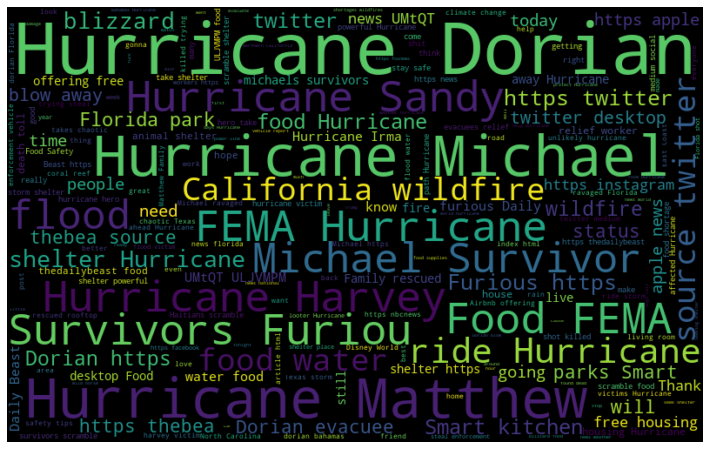

In [106]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Frequent Positive Word

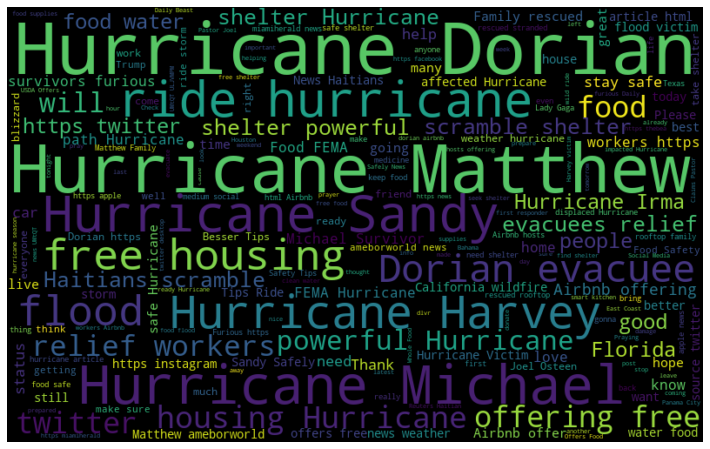

In [107]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Frequent Negative Word

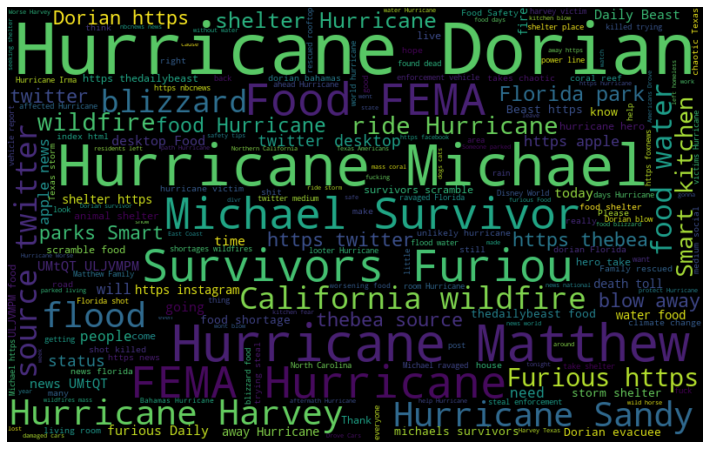

In [108]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Heatmaps

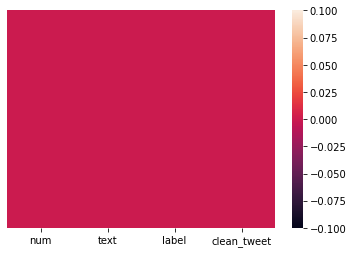

In [109]:
sns.heatmap(df.isnull(), yticklabels = False)
plt.show()

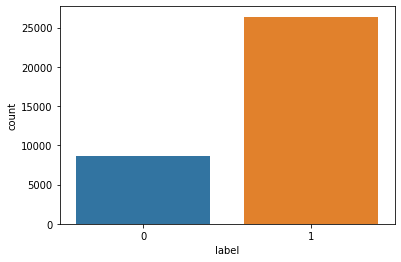

In [111]:
sns.countplot(x = df['label'])
plt.show()

In [112]:
temp = df.groupby('label').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,label,text
1,1,26374
0,0,8595


Unbalanced Data needs to Balanced

In [115]:
fig = go.Figure(go.Funnelarea(
    text =temp.label,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

Balancing data

In [118]:
count_class_1,count_class_0 = df.label.value_counts()
df_class_0 = df[df['label']==0]
df_class_1 = df[df['label']==1]

In [119]:
df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_1_under,df_class_0],axis=0)
df_test_under.shape

(17190, 4)

In [120]:
df_class_0.shape

(8595, 4)

In [121]:
df_class_1.shape

(26374, 4)

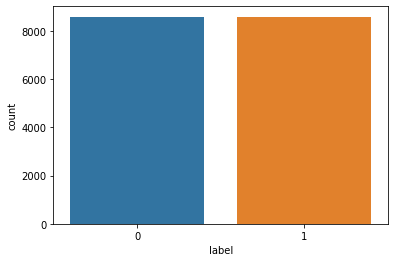

In [122]:
sns.countplot(x='label',data=df_test_under)

In [123]:
df_test_under.shape

(17190, 4)

In [124]:
positive = df_class_1[df_class_1['label']==1]
positive

,num,text,label,clean_tweet
0,2.393330e+07,They make Hurricane Sandy sound like a big dea...,1,They make Hurricane Sandy sound like deal gott...
1,6.194548e+08,The kitchen was out of mad food tonight so I t...,1,kitchen food tonight told customers that hurri...
2,8.856981e+08,Hundreds if not thousands of people lost their...,1,Hundreds thousands people lost their homes lov...
3,1.459002e+08,“@_KingDing_ALing: My TL right now:\n-The Heat...,1,right Heat Lakers Hurricane Sandy Some bitch b...
5,7.137219e+07,"$50 in food and $60 in liquor later, we hit th...",1,food liquor later Hurricane Sandy party late #...
...,...,...,...,...
7081,1.625589e+07,Bahamians rescued victims of Hurricane Dorian ...,1,Bahamians rescued victims Hurricane Dorian wit...
7094,1.990336e+07,Bahamians have rescued victims of Hurricane Do...,1,Bahamians have rescued victims Hurricane Doria...
7127,2.377450e+09,Bahamians rescued victims of Hurricane #Dorian...,1,Bahamians rescued victims Hurricane #Dorian wi...
7130,1.110000e+18,Bahamians rescued victims of Hurricane Dorian ...,1,Bahamians rescued victims Hurricane Dorian wit...


In [125]:
negative = df_class_0[df_class_0['label']==0]
negative

,num,text,label,clean_tweet
4,4.770938e+08,#YouGainMajorPointsIf you go to dollarama whil...,0,#YouGainMajorPointsIf dollarama while hurrican...
8,4.230166e+07,junk food + magic mike with hurricane sandy ht...,0,junk food magic mike with hurricane sandy http...
12,7.511850e+08,Healthy food to stock up during hurricane #san...,0,Healthy food stock during hurricane #sandy vid...
13,1.755765e+08,"""Keep Food and Family Safe During Power Outage...",0,Keep Food Family Safe During Power Outage from...
18,2.725834e+07,"WBNG: Getting Food to East Coast: Kirkwood, NY...",0,WBNG Getting Food East Coast Kirkwood WBNG Bin...
...,...,...,...,...
6922,1.050000e+18,AEROSPACE WEATHER \nSPECIAL REPORT!\n\nw/ Dr. ...,0,AEROSPACE WEATHER SPECIAL REPORT Weather Corre...
6974,1.120000e+18,We were the first nation to be delivering aid ...,0,were first nation delivering medicine victims ...
6994,8.062820e+07,"Residents in Florida, Georgia, North Carolina ...",0,Residents Florida Georgia North Carolina South...
7014,1.355558e+08,We're sending medicine to Grand Bahama and Aba...,0,sending medicine Grand Bahama Abacos islands r...


Extract Hashtag

In [127]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags 

In [128]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [129]:
ht_positive[:5]

[['YouGainMajorPointsIf'], [], ['sandy'], [], []]

In [130]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

Positive Hashtag

In [131]:
ht_positive[:5]

['YouGainMajorPointsIf', 'sandy', 'hurricane', 'Sandy', 'hurricane']

In [132]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,YouGainMajorPointsIf,1
1,sandy,34
2,hurricane,62
3,Sandy,90
4,food,50


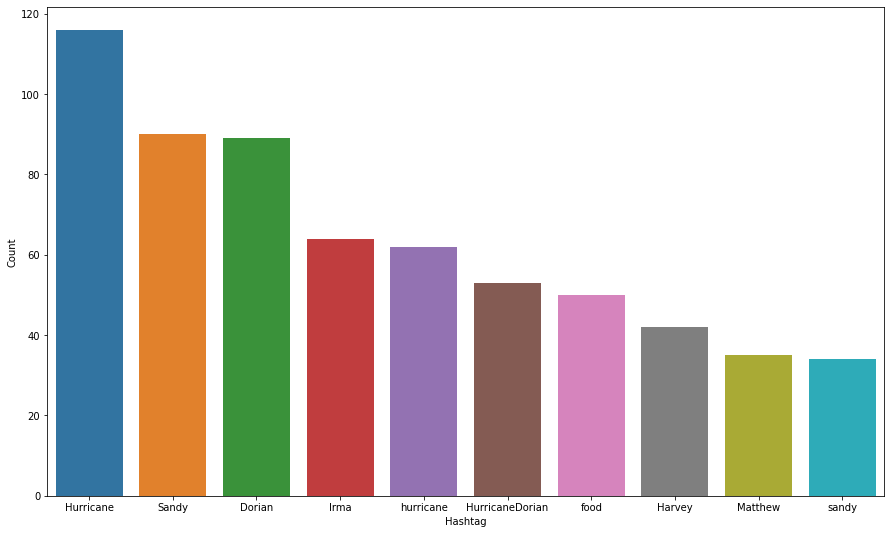

In [133]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

Negative Hashtag

In [134]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,nojoke,2
1,sorryboutit,2
2,octomom,1
3,BLESS,1
4,law,4


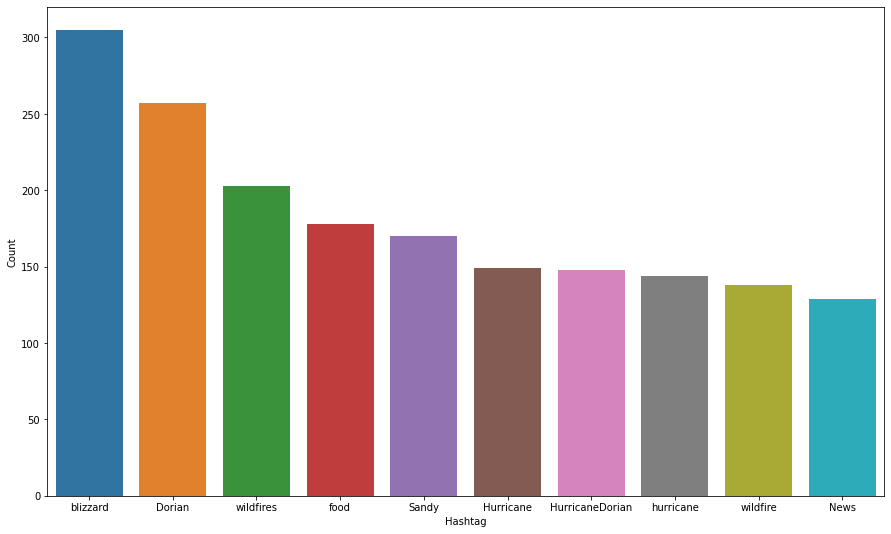

In [135]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

Input Split

In [136]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

Model Training

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [139]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [140]:
LogisticRegression()

LogisticRegression()

Evaluating Evaluation Metric

In [141]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.9038083448627394

In [142]:
accuracy_score(y_test,pred)

0.8489076975866408

In [143]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.8972545757071548

In [144]:
accuracy_score(y_test,pred)

0.8304929658012123

In [145]:
pred_prob[0][1] >= 0.3

True

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.37      0.52      2120
           1       0.83      0.98      0.90      6623

    accuracy                           0.83      8743
   macro avg       0.83      0.67      0.71      8743
weighted avg       0.83      0.83      0.80      8743



Predict

In [153]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE